In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('zoom_5g.csv')

In [4]:
data.head()

,No.,Time,Source,Destination,Protocol,Length,Info
0,1,0.000000,64:ff9b::90c3:814b,2001:2d8:e66a:6a64:1017:2d59:1a1a:ea66,UDP,998,8801 > 61832 Len=950
1,2,0.000021,2001:2d8:e66a:6a64:1017:2d59:1a1a:ea66,64:ff9b::90c3:814b,UDP,1084,61832 > 8801 Len=1036
2,3,0.000034,64:ff9b::90c3:814b,2001:2d8:e66a:6a64:1017:2d59:1a1a:ea66,UDP,998,8801 > 61832 Len=950
3,4,0.000047,64:ff9b::90c3:814b,2001:2d8:e66a:6a64:1017:2d59:1a1a:ea66,UDP,998,8801 > 61832 Len=950
4,5,0.000061,64:ff9b::90c3:814b,2001:2d8:e66a:6a64:1017:2d59:1a1a:ea66,UDP,1029,8801 > 61832 Len=981


In [5]:
data1 = data
data1.head()

,No.,Time,Source,Destination,Protocol,Length,Info
0,1,0.000000,64:ff9b::90c3:814b,2001:2d8:e66a:6a64:1017:2d59:1a1a:ea66,UDP,998,8801 > 61832 Len=950
1,2,0.000021,2001:2d8:e66a:6a64:1017:2d59:1a1a:ea66,64:ff9b::90c3:814b,UDP,1084,61832 > 8801 Len=1036
2,3,0.000034,64:ff9b::90c3:814b,2001:2d8:e66a:6a64:1017:2d59:1a1a:ea66,UDP,998,8801 > 61832 Len=950
3,4,0.000047,64:ff9b::90c3:814b,2001:2d8:e66a:6a64:1017:2d59:1a1a:ea66,UDP,998,8801 > 61832 Len=950
4,5,0.000061,64:ff9b::90c3:814b,2001:2d8:e66a:6a64:1017:2d59:1a1a:ea66,UDP,1029,8801 > 61832 Len=981


In [6]:
data1 = data1.drop(['No.', 'Protocol', 'Info'], axis = 1)
data1.head()

,Time,Source,Destination,Length
0,0.000000,64:ff9b::90c3:814b,2001:2d8:e66a:6a64:1017:2d59:1a1a:ea66,998
1,0.000021,2001:2d8:e66a:6a64:1017:2d59:1a1a:ea66,64:ff9b::90c3:814b,1084
2,0.000034,64:ff9b::90c3:814b,2001:2d8:e66a:6a64:1017:2d59:1a1a:ea66,998
3,0.000047,64:ff9b::90c3:814b,2001:2d8:e66a:6a64:1017:2d59:1a1a:ea66,998
4,0.000061,64:ff9b::90c3:814b,2001:2d8:e66a:6a64:1017:2d59:1a1a:ea66,1029


In [7]:
p = data1.Source.str.startswith('64')
data1.loc[p, 'Source'] = 'phone'
p = data1.Destination.str.startswith('64')
data1.loc[p, 'Destination'] = 'phone'

In [8]:
b = data1.Source.str.contains(':')
data1.loc[b, 'Source'] = 'base'
b = data1.Destination.str.contains(':')
data1.loc[b, 'Destination'] = 'base'

In [9]:
data1['Link'] = data1.apply(lambda a: "UL" if a.Source == 'phone' else "DL", axis = 1)

In [10]:
ul = []
dl = []
columns = ['time', 'traffic']

for i in data1.values:
    if i[4] == "UL":
        ul.append([i[0], int(i[3])])
    elif i[4] == "DL":
        dl.append([i[0], int(i[3])])

ul = np.array(ul)
dl = np.array(dl)

In [15]:
a = np.arange(1, 2011)    # 기록 시간
a = set(a)
b = []
ult = ul.T[0]
for i in ult:
    b.append(int(i))
b = set(b)
print(a-b)

{1841, 2010, 139, 1118}


In [16]:
ul_bitrate = []
dl_bitrate = []

tps = 0    # traffic per second
cnt = 1
not_measured = list(a-b)

for i, j in ul:
    time = i
    traffic = j
    
    tps += traffic

    if int(i) == cnt:
        tps = tps * 8 / 1000
        ul_bitrate.append([cnt, tps])
        cnt += 1
        tps = 0
    if cnt in not_measured:
        cnt += 1
    
    if i == len(ul) - 1:
        tps = tps * 8 / 1000
        ul_bitrate.append([cnt, tps])

In [17]:
a = np.arange(1, 2011)
a = set(a)
b = []
dlt = dl.T[0]
for i in dlt:
    b.append(int(i))
b = set(b)
print(a-b)

{1841, 2010, 1118}


In [18]:
tps = 0    # traffic per second
cnt = 1
not_measured = list(a-b)

for i, j in dl:
    time = i
    traffic = j
    
    tps += traffic

    if int(i) == cnt:
        tps = tps * 8 / 1000
        dl_bitrate.append([cnt, tps])
        cnt += 1
        tps = 0
    if cnt in not_measured:
        cnt += 1
    
    if i == len(dl) - 1:
        tps = tps * 8 / 1000
        dl_bitrate.append([cnt, tps])

In [19]:
ul_bitrate = np.array(ul_bitrate)
dl_bitrate = np.array(dl_bitrate)

In [20]:
df = pd.DataFrame(ul_bitrate)
df

,0,1
0,1.0,1028.640
1,2.0,958.208
2,3.0,1039.408
3,4.0,951.408
4,5.0,970.736
...,...,...
2001,2005.0,989.056
2002,2006.0,985.456
2003,2007.0,961.048
2004,2008.0,922.232


In [21]:
seq= df[[1]].to_numpy()
seq

array([[1028.64 ],
       [ 958.208],
       [1039.408],
       ...,
       [ 961.048],
       [ 922.232],
       [ 976.848]])

In [22]:
from statsmodels.tsa.arima_model import ARIMA

In [23]:
def my_auto_arima(data, order,sort = 'AIC'):
    order_list = []
    aic_list = []
    bic_lsit = []
    for p in range(order[0]):
            for d in range(order[1]):
                 for q in range(order[2]):
                        model = ARIMA(data, order=(p,d,q))
                        try:
                            model_fit = model.fit()
                            c_order = f'p{p} d{d} q{q}'
                            aic = model_fit.aic
                            bic = model_fit.bic
                            order_list.append(c_order)
                            aic_list.append(aic)
                            bic_list.append(bic)
                        except:
                            pass
    result_df = pd.DataFrame(list(zip(order_list, aic_list)),columns=['order','AIC'])
    result_df.sort_values(sort, inplace=True)
    return result_df

In [24]:
my_auto_arima(seq,[3,3,3])

C:\Users\o9906\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\o9906\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.AR

C:\Users\o9906\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\o9906\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.AR

,order,AIC
13,p1 d1 q1,22884.748456
14,p1 d1 q2,22886.705646
20,p2 d1 q1,22886.708601
21,p2 d1 q2,22888.741916
17,p2 d0 q1,22898.402806
18,p2 d0 q2,22900.375062
5,p0 d1 q2,22913.625882
11,p1 d0 q2,22925.631466
8,p0 d2 q2,22991.495656
4,p0 d1 q1,22991.563015


C:\Users\o9906\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\o9906\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.AR

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                 2005
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -11438.375
Method:                       css-mle   S.D. of innovations             72.667
Date:                Wed, 04 May 2022   AIC                          22882.749
Time:                        13:34:13   BIC                          22899.559
Sample:                             1   HQIC                         22888.921
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.D.y      0.4953      0.033     15.044      0.000       0.431       0.560
ma.L1.D.y     -0.8353      0.021    -40.385      0.000      -0.876      -0.795
                                    Roots           

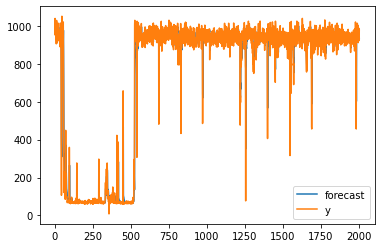

In [26]:
model = ARIMA(seq, (1,1,1))
model_fit = model.fit(trend='nc')
print(model_fit.summary())
model_fit.plot_predict()
plt.show()

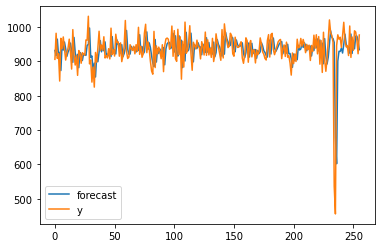

In [27]:
model_fit.plot_predict(start=1750)
plt.show()

In [28]:
from pmdarima.arima import auto_arima

model_arima= auto_arima(seq,trace=True, error_action='ignore', start_p=1,start_q=1,max_p=3,max_q=3,suppress_warnings=True,stepwise=False,seasonal=False)

model_arima.fit(seq)

 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=23166.236, Time=0.22 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=22991.523, Time=0.88 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=22913.601, Time=1.49 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=22896.958, Time=2.31 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=23057.627, Time=0.16 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=22884.708, Time=1.59 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=22886.665, Time=2.54 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=22888.266, Time=4.01 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=22992.007, Time=0.44 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=22886.668, Time=2.11 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=22888.704, Time=2.80 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=22890.626, Time=3.98 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=22960.774, Time=0.55 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=22888.261, Time=3.69 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=22890.255, Time=6.06

ARIMA(order=(1, 1, 1), scoring_args={}, suppress_warnings=True)

In [30]:
model = ARIMA(seq, order=(1,1,1))

model_fit = model.fit(disp=0,trend='nc')

print(model_fit.summary())

C:\Users\o9906\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\o9906\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.AR

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                 2005
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -11438.375
Method:                       css-mle   S.D. of innovations             72.667
Date:                Wed, 04 May 2022   AIC                          22882.749
Time:                        13:36:29   BIC                          22899.559
Sample:                             1   HQIC                         22888.921
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.D.y      0.4953      0.033     15.044      0.000       0.431       0.560
ma.L1.D.y     -0.8353      0.021    -40.385      0.000      -0.876      -0.795
                                    Roots           

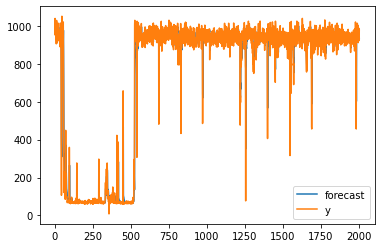

In [31]:
model_fit.plot_predict(dynamic=False)

plt.show()

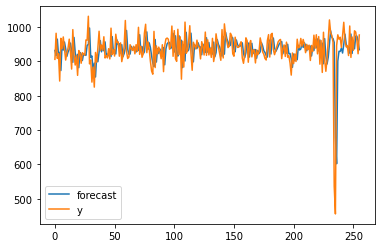

In [32]:
model_fit.plot_predict(start=1750)
plt.show()